## **1. Data Collection and Handling**

In [181]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [182]:
import pandas as pd

In [183]:
from google.colab import files

uploaded = files.upload()

Saving DATAs.csv to DATAs (2).csv


In [297]:
data= pd.read_csv('DATAs (2).csv')
data.head()

,Polymer,Substrate,Dosage [ppm],Adsorption [mg/m2],pH,MW,Tempearture [C],Ref
0,PAM,Silica,0.0010,0.086,6,17000,NAN,NaN
1,PAM,Silica,0.0030,0.213,6,17000,NAN,NaN
2,PAM,Silica,0.0270,0.239,6,17000,NAN,NaN
3,PAM,Silica,0.0051,0.260,6,17000,NAN,NaN
4,PAM,Silica,0.0082,0.256,6,17000,NAN,NaN


#**DATA SET OVERVIEW**`

In [244]:
overview = data.apply(lambda col: col.unique())
overview

Polymer                                    [PAM, H-PAM, Al-PAM, Fe-PAM]
Substrate             [Silica, kaolinite, Alumina, illite, Kaolinite...
Dosage [ppm]          [7.251, 75.885, 48.567, 34.064, 20.236, 6.577,...
Adsorption [mg/m2]    [0.024, 0.242, 0.206, 0.168, 0.094, 0.033, 0.2...
pH                                                  [6, 8.5, 9, 3, NAN]
MW                    [1500, 10000, 17000, 167000, 181000, 817000, 1...
Tempearture [C]                   [25, 15, 35, NAN, 29, 28, 27, 26, 30]
Ref                   [The temperature effect on the adsorption mech...
dtype: object

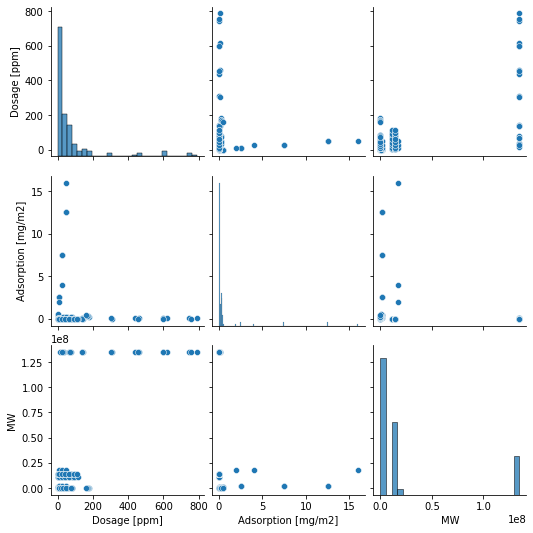

In [299]:
import seaborn as sns

sns.pairplot(data)

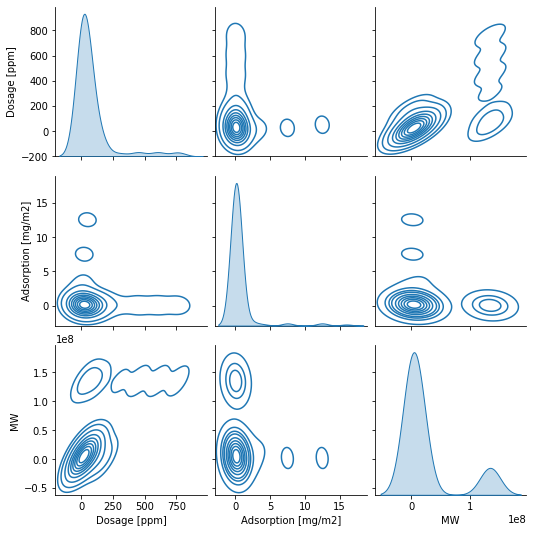

In [300]:
sns.pairplot(data, kind="kde")

**MW is changing from 1500 till ~ millions, temperature is changing from 25-30 etc**

# Sorting values 

In [197]:
data=data.sort_values(by=['MW'])

In [198]:
data.head()

,Polymer,Substrate,Dosage [ppm],Adsorption [mg/m2],pH,MW,Tempearture [C],Ref
69,PAM,Silica,7.251,0.024,6,1500,25,The temperature effect on the adsorption mecha...
79,PAM,Silica,75.885,0.242,6,1500,15,The temperature effect on the adsorption mecha...
78,PAM,Silica,48.567,0.206,6,1500,15,The temperature effect on the adsorption mecha...
77,PAM,Silica,34.064,0.168,6,1500,15,The temperature effect on the adsorption mecha...
76,PAM,Silica,20.236,0.094,6,1500,15,The temperature effect on the adsorption mecha...


In [199]:
y=data['Dosage [ppm]']


In [200]:
x=data['Adsorption [mg/m2]']


In [201]:
z=data['MW']

In [202]:
s=data['MW'].unique()
s

array([     1500,     10000,     17000,    167000,    181000,    817000,
         1284000,   1600000,  11000000,  14000000,  17500000, 135000000])

In [209]:
k=[]
for j in range(len(s)):
    l=[]
    P=[]
   
    for i in range(len(y)):
        if z[i]==s[j]:
           l.append(y[i])
           P.append(x[i])
    S=sum(P)/sum(l)
    k.append(S)      





In [204]:
k

[0.0021968222013253338,
 0.0027359021442956988,
 6.295854458693707,
 7.5419580419580425,
 12.969696969696972,
 10.321705426356589,
 8.883268482490271,
 0.2647058823529412,
 3.414008152726977e-06,
 4.1163624630145994e-06,
 0.25882352941176473,
 0.00012080598147038907]

In [208]:
s=data['MW'].unique()
s=s[0:len(s)-2]
s

array([    1500,    10000,    17000,   167000,   181000,   817000,
        1284000,  1600000, 11000000, 14000000])

In [206]:
import matplotlib.pyplot as plt

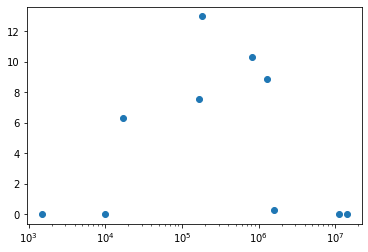

In [210]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(s,k)
ax.set_xscale('log') 

In [211]:
k = np.array(k)


In [212]:
s=s.reshape(-1, 1)

In [213]:
k=k.reshape(-1, 1)

In [214]:
s

array([[    1500],
       [   10000],
       [   17000],
       [  167000],
       [  181000],
       [  817000],
       [ 1284000],
       [ 1600000],
       [11000000],
       [14000000]])

In [215]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [216]:
regressor = LinearRegression()
regressor.fit(s,k)


LinearRegression()

In [217]:
print(regressor.intercept_)
print(regressor.coef_)


[5.98295281]
[[-4.6590658e-07]]


In [218]:
KK=regressor.coef_*s+regressor.intercept_

In [221]:
KK

array([[ 5.98225395],
       [ 5.97829374],
       [ 5.9750324 ],
       [ 5.90514641],
       [ 5.89862372],
       [ 5.60230713],
       [ 5.38472876],
       [ 5.23750228],
       [ 0.85798043],
       [-0.53973931]])

The relationship between adsorption/dosage and MW is adsorption/dosage=-6.8e-8MW+9.23

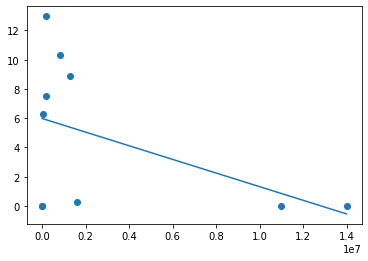

In [222]:
fig = plt.figure()
ax = plt.gca()
ax.plot(s,KK)
ax.scatter(s,k)

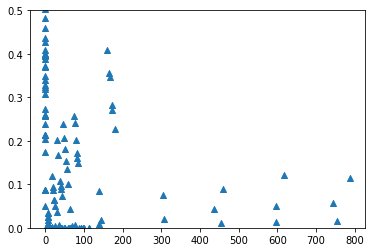

In [233]:
fig = plt.figure()
ax = plt.gca()
symbol = "^"

plt.ylim(0,0.5)
ax.scatter(y,x, marker=symbol)


**Creation of correlation table**

In [235]:
import pandas as pd
import numpy as np

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Dosage [ppm],Adsorption [mg/m2],MW
Dosage [ppm],1.000000,-0.066695,0.676923
Adsorption [mg/m2],-0.066695,1.000000,-0.102870
MW,0.676923,-0.102870,1.000000


In [236]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Dosage [ppm],Adsorption [mg/m2],MW
Dosage [ppm],1.00,-0.07,0.68
Adsorption [mg/m2],-0.07,1.00,-0.10
MW,0.68,-0.10,1.00


**Trying to find frequency of data on different susbstrates**

---





In [267]:
L=data['Substrate'].unique()
KKK=data['Substrate']
k=[]
count = 0
for j in range(len(KKK)):
    if KKK[j]=='Silica':
       count += 1

     
k.append(count)

In [270]:
L=data['Substrate'].unique()
L

array(['Silica', 'kaolinite', 'Alumina', 'illite', 'Kaolinite',
       'Smectite'], dtype=object)

In [281]:
kP=[]
KKK=data['Substrate']
for i in range(6):
    count = 0
    for j in range(len(KKK)):
        if KKK[j]==L[i]:
           count += 1  
    kP.append(count)
    


In [282]:
L

array(['Silica', 'kaolinite', 'Alumina', 'illite', 'Kaolinite',
       'Smectite'], dtype=object)

Displaying frequency of substrates in the data 

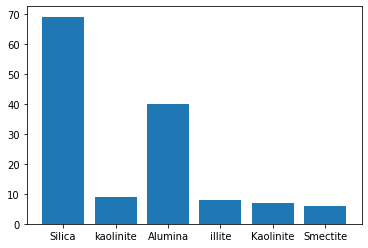

In [285]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.bar(L,kP)
plt.show()

Pie chart with labels

([<matplotlib.patches.Wedge at 0x7f1c82f94d50>,
 [Text(0.01243045697166547, 1.0999297630937512, 'Silica'),
  Text(-1.0820679641060151, -0.19781031584693406, 'kaolinite'),
  Text(-0.3066513769227746, -1.0563924143193033, 'Alumina'),
  Text(0.790889988621063, -0.7645214358662384, 'illite'),
  Text(1.00012527433816, -0.4579840997567716, 'Kaolinite'),
  Text(1.0899012192541002, -0.14871224653143364, 'Smectite')])

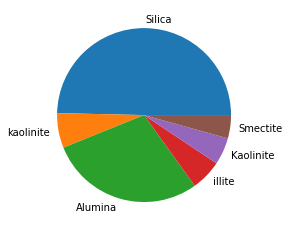

In [287]:
plt.pie(kP,labels = L)

([<matplotlib.patches.Wedge at 0x7f1c825fd550>,
 [Text(-1.0999297630937512, 0.012430456971665537, 'Silica'),
  Text(0.21579307183301838, -1.1804377790247438, 'kaolinite'),
  Text(1.0563924143193033, -0.30665137692277467, 'Alumina'),
  Text(0.7645214358662386, 0.7908899886210629, 'illite'),
  Text(0.4579840997567717, 1.00012527433816, 'Kaolinite'),
  Text(0.1757508368098762, 1.2880650773003002, 'Smectite')],
 [Text(-0.5999616889602278, 0.00678024925727211, '49.6%'),
  Text(0.12587929190259403, -0.6885887044311005, '6.5%'),
  Text(0.5762140441741653, -0.16726438741242253, '28.8%'),
  Text(0.41701169229067553, 0.4313945392478524, '5.8%'),
  Text(0.24980950895823906, 0.5455228769117235, '5.0%'),
  Text(0.10815436111376996, 0.7926554321848002, '4.3%')])

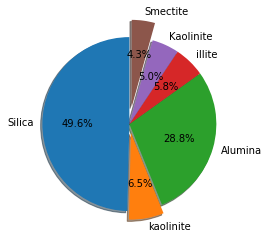

In [294]:
explode = (0, 0.1, 0, 0,0,0.2)
plt.pie(kP,labels = L, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)

Displaying pie chart with seaborn

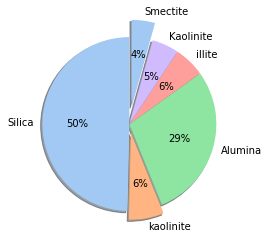

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = kP
labels = L

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',explode=explode,
        shadow=True, startangle=90)
plt.show()